# Ⅰ. 女性に対する不倫調査（1974年）

## 1. モジュール読込

In [95]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import math

#プロット用
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# matplotlibの表示設定
%matplotlib inline

# 機械学習用
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# 性能評価用
from sklearn import metrics

import statsmodels.api as sm

## 2. データ整形

### データの一部を表示

In [96]:
df = sm.datasets.fair.load_pandas().data
df.head(3)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000


Number of observations: 6366 Number of variables: 9 Variable name definitions:
* rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair, 4 = good, 5 = very good
* age             : Age
* yrs_married     : No. years married. Interval approximations. See original paper for detailed explanation.
* children        : No. children
* religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly, 4 = strongly
* educ            : Level of education, 9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree
* occupation      : 1 = student, 2 = farming, agriculture; semi-skilled, or unskilled worker; 3 = white-colloar; 4 = teacher counselor social worker, nurse; artist, writers; technician, skilled worker, 5 = managerial, administrative, business, 6 = professional with advanced degree
* occupation_husb : Husband's occupation. Same as occupation.
* affairs         : measure of time spent in extramarital affairs

In [97]:
# データの特性（個数、平均値、標準偏差、最大値、最小値、四分位数など）を表示
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [98]:
# affairsに値があれば浮気したとみなす
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

# 列を追加
df['Had_Affair'] = df['affairs'].apply(affair_check)

df.head(3)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1


In [99]:
# 不倫の有無（Had_Affair列）でグループ分け
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


### ヒストグラムで可視化

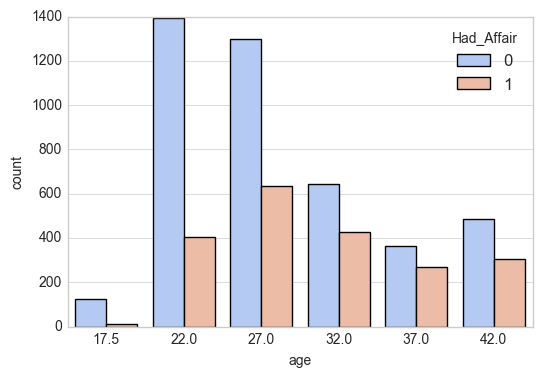

In [100]:
# 年齢
sns.countplot('age',data=df.sort_values(by='age'),hue='Had_Affair',palette='coolwarm')

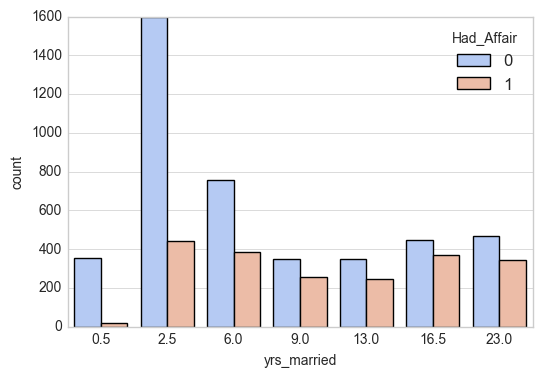

In [101]:
# 夫婦歴
sns.countplot('yrs_married',data=df.sort_values(by='yrs_married'),hue='Had_Affair',palette='coolwarm')

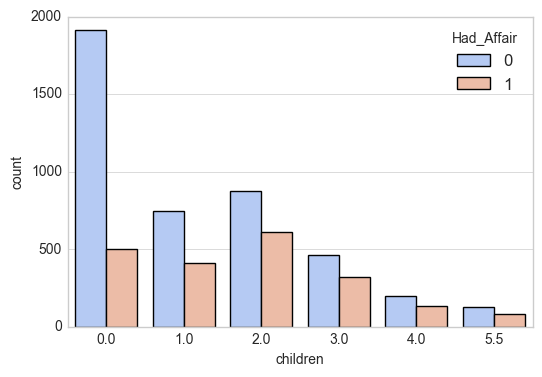

In [102]:
# 子供の数
sns.countplot('children',data=df.sort_values(by='children'),hue='Had_Affair',palette='coolwarm')

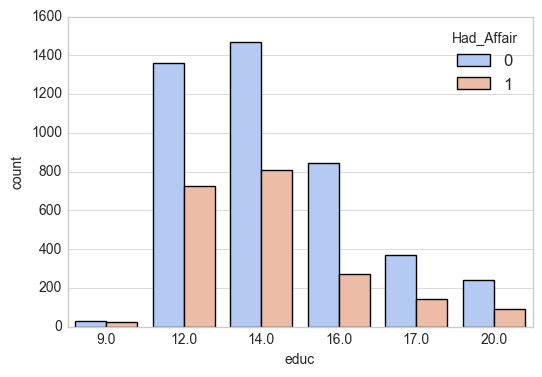

In [103]:
# 学歴
sns.countplot('educ',data=df.sort_values(by='educ'),hue='Had_Affair',palette='coolwarm')

### ダミー変数に変換

In [104]:
# 妻の職業の種類を変換
occ_dummies = pd.get_dummies(df['occupation'])
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [105]:
# 列名を付与
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [106]:
# 夫の職業にも同様の操作を加える
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']
hus_occ_dummies.head()

,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


In [107]:
# 不要になった職業の列と、目的変数「Had_Affair」を削除
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)
X.head(3)

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000


In [108]:
# ダミー変数のDataFrameとして結合
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

# 説明変数Xとダミー変数を結合
X = pd.concat([X,dummies],axis=1)

X.head(3)

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [109]:
# 多重共線性を考慮
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# 目的変数を削除
X = X.drop('affairs',axis=1)

X.head(3)

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [110]:
# Yに目的変数を格納
Y = df.Had_Affair

Y.head(3)

0    1
1    1
2    1
Name: Had_Affair, dtype: int64

## 3. モデル作成

In [111]:
# インスタンス作成
log_model = LogisticRegression()

# データを代入して学習
log_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 4. 評価

In [112]:
# モデルの精度を表示
log_model.score(X,Y)

0.72588752748978946

## 5. 結果

In [113]:
# 変数名と係数を格納
# 係数が正 -> その変数が増えれば、不倫の可能性は増加
# 係数が負 -> その変数が増えれば、不倫の可能性は減少
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T
coeff_df

,0,1
0,rate_marriage,-0.697885
1,age,-0.056347
2,yrs_married,0.103906
3,children,0.0181728
4,religious,-0.368496
5,educ,0.00878983
6,occ2,0.297979
7,occ3,0.607916
8,occ4,0.346038
9,occ5,0.942365


## 6. おまけ

In [114]:
# 学習用とテスト用データの作成
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# インスタンス作成
log_model_extra = LogisticRegression()

# 学習
log_model_extra.fit(X_train, Y_train)

# テスト用データで予測
result = log_model_extra.predict(X_test)

# 精度
metrics.accuracy_score(Y_test,result)

0.73743718592964824